In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

### Q1

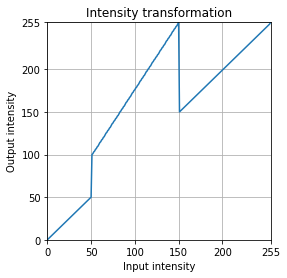

In [3]:
#create intensity tranformation piecewise
t1 = np.linspace(0, 50, 50+1)
t2 = np.linspace(100, 255, 100)
t3 = np.linspace(150, 255, 105)

t = np.concatenate((t1, t2, t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(figsize = (4,4))
ax.plot(t)
ax.set_xlabel("Input intensity")
ax.set_ylabel("Output intensity")
ax.set_title("Intensity transformation")

ax.set_xlim(0,255)
ax.set_ylim(0,255)

ax.set_xticks((0,50,100,150,200,255))
ax.set_xticklabels((0,50,100,150,200,255))
ax.set_yticks((0,50,100,150,200,255))
ax.set_yticklabels((0,50,100,150,200,255))

ax.grid()
plt.show()

Text(0.5, 1.0, 'Intensity transformed image')

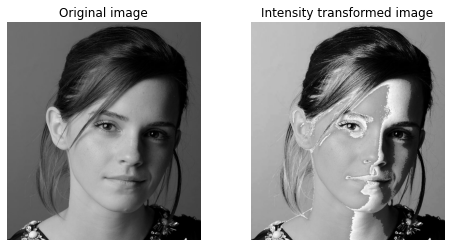

In [4]:
f = cv.imread('Images\emma_gray.jpg')
g = cv.LUT(f, t)

f_rgb = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g_rgb = cv.cvtColor(g, cv.COLOR_BGR2RGB)

fig,ax = plt.subplots(1,2 , figsize=(8,4))
ax[0].imshow(f_rgb)
ax[0].axis('off')
ax[0].set_title("Original image")

ax[1].imshow(g_rgb)
ax[1].axis('off')
ax[1].set_title("Intensity transformed image")


### Q2

Finding the range of values

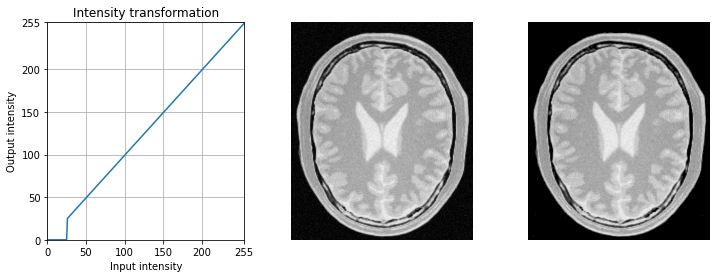

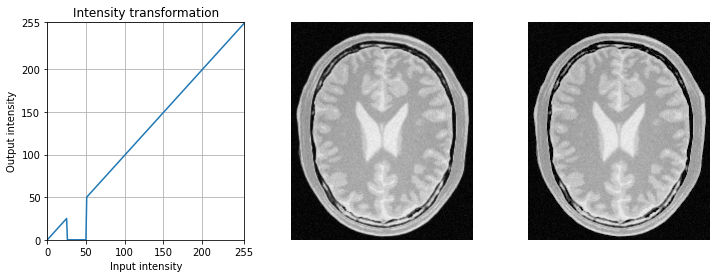

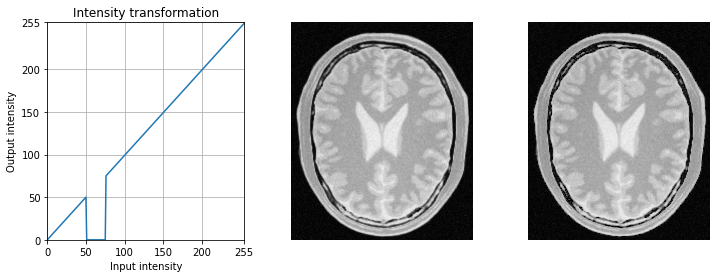

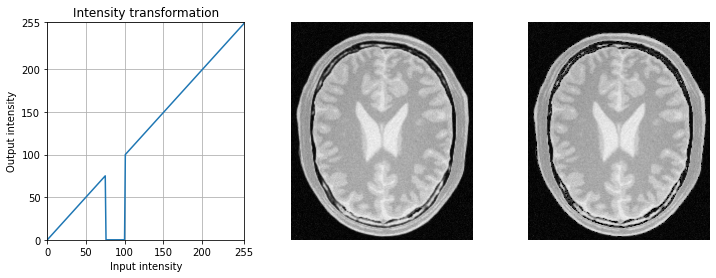

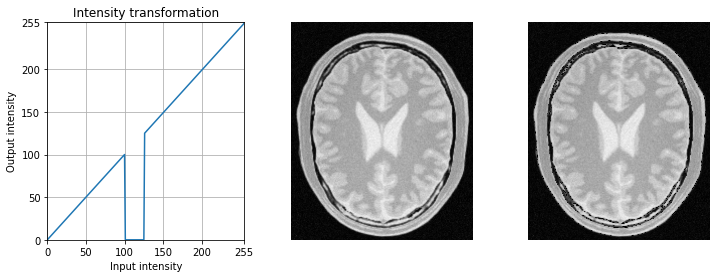

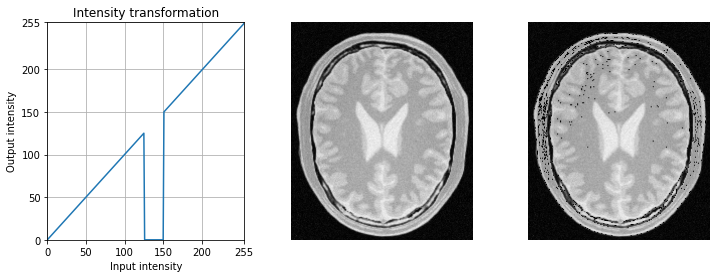

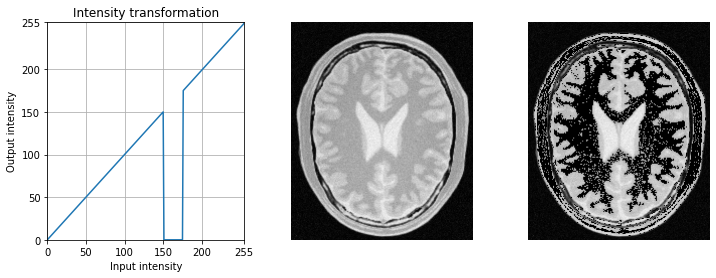

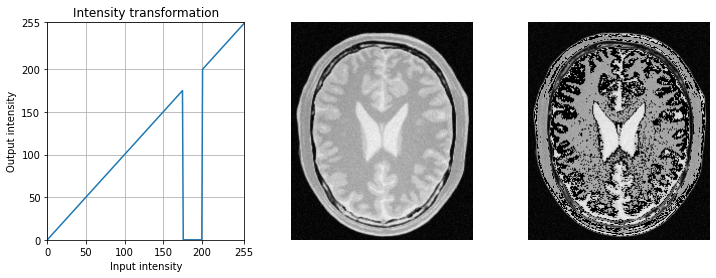

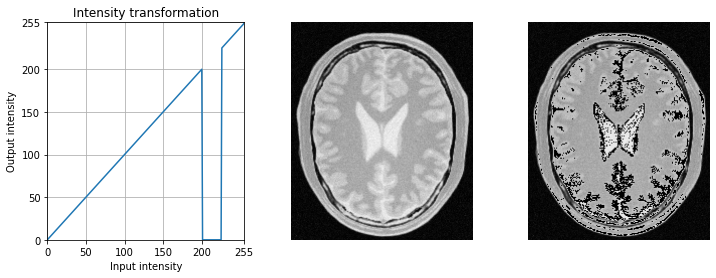

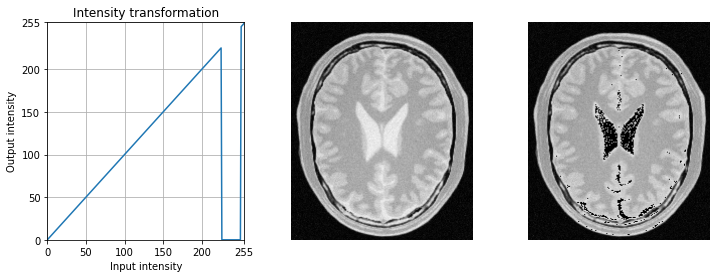

In [3]:
f = cv.imread('Images/brain_proton_density_slice.png')
assert f is not None

for i in range(10):
    t1 = np.linspace(0, 25*i, 25*i+1)
    t2 = 0*np.ones(25)
    t3 = np.linspace(25*(i+1), 255, 255-25*(i+1))
    t = np.concatenate((t1,t2,t3)).astype(np.uint8)
    assert len(t) == 256

    fig, ax = plt.subplots(1,3, figsize = (12, 4))
    ax[0].plot(t)
    ax[0].set_xlabel("Input intensity")
    ax[0].set_ylabel("Output intensity")
    ax[0].set_title("Intensity transformation")

    ax[0].set_xlim(0,255)
    ax[0].set_ylim(0,255)
    
    ax[0].set_xticks((0,50,100,150,200,255))
    ax[0].set_xticklabels((0,50,100,150,200,255))
    ax[0].set_yticks((0,50,100,150,200,255))
    ax[0].set_yticklabels((0,50,100,150,200,255))

    ax[0].grid()

    g = cv.LUT(f, t)
    g = cv.cvtColor(g, cv.COLOR_RGB2BGR)
    
    ax[1].imshow(f)
    ax[1].axis('off')
    ax[1].grid()

    ax[2].imshow(g)
    ax[2].axis('off')
    ax[2].grid()

    
    plt.show()

a) White matter

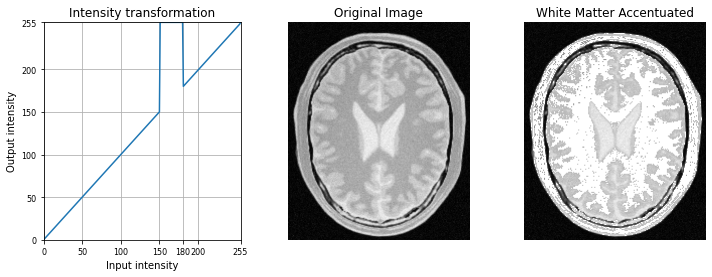

In [16]:
f = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 150, 150+1)
t2 = 255*np.ones(30)
t3 = np.linspace(180, 255, 255-180)
t = np.concatenate((t1,t2,t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(t)
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation")

ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)

ax[0].set_xticks((0,50,100,150,180,200,255))
ax[0].set_xticklabels((0,50,100,150,180,200,255),fontsize="8")
ax[0].set_yticks((0,50,100,150,200,255))
ax[0].set_yticklabels((0,50,100,150,200,255),fontsize="8")

ax[0].grid()

g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

ax[1].imshow(f)
ax[1].axis('off')
ax[1].set_title("Original Image")

ax[2].imshow(g)
ax[2].axis('off')
ax[2].set_title("White Matter Accentuated")


plt.show()


b) Gray matter

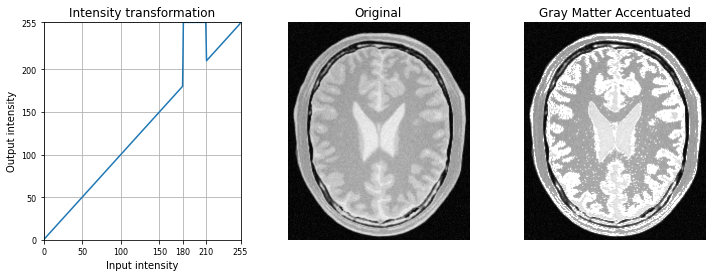

In [17]:
f = cv.imread('Images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert f is not None

t1 = np.linspace(0, 180, 180+1)
t2 = 255*np.ones(210-180)
t3 = np.linspace(210,255,255-210)
t = np.concatenate((t1,t2,t3)).astype(np.uint8)
assert len(t) == 256

fig, ax = plt.subplots(1,3, figsize = (12, 4))
ax[0].plot(t)
ax[0].set_xlabel("Input intensity")
ax[0].set_ylabel("Output intensity")
ax[0].set_title("Intensity transformation")

ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)

ax[0].set_xticks((0,50,100,150,180,210,255))
ax[0].set_xticklabels((0,50,100,150,180,210,255),fontsize="8")
ax[0].set_yticks((0,50,100,150,200,255))
ax[0].set_yticklabels((0,50,100,150,200,255),fontsize="8")

ax[0].grid()

g = cv.LUT(f, t)

f = cv.cvtColor(f, cv.COLOR_BGR2RGB)
g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

ax[1].imshow(f)
ax[1].axis('off')
ax[1].set_title("Original")


ax[2].imshow(g)
ax[2].axis('off')
ax[2].set_title("Gray Matter Accentuated")


plt.show()


### Q3

a)

[]

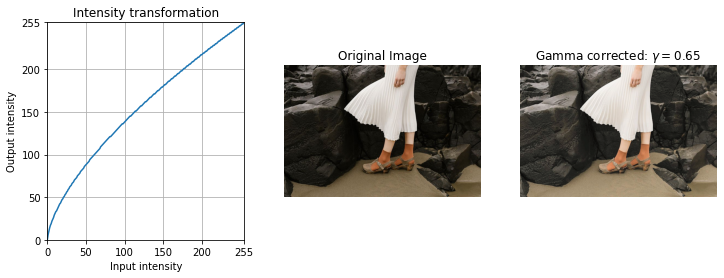

In [5]:
im = cv.imread("Images\highlights_and_shadows.jpg")
im_rgb = cv.cvtColor(im, cv.COLOR_BGR2RGB)

f = cv.cvtColor(im, cv.COLOR_BGR2LAB)
L,a,b = cv.split(f)

g = 0.65

t = np.array([(i/255)**g*255 for i in range(0,256)], dtype = np.uint8)
L_corrected = cv.LUT(L, t)

f_new = cv.merge((L_corrected, a, b))
f_new_rgb = cv.cvtColor(f_new, cv.COLOR_LAB2RGB)

fig, axs = plt.subplots(1,3,figsize=(12,4))

axs[0].plot(t)
axs[0].set_xlabel("Input intensity")
axs[0].set_ylabel("Output intensity")
axs[0].set_title("Intensity transformation")

axs[0].set_xlim(0,255)
axs[0].set_ylim(0,255)

axs[0].set_xticks((0,50,100,150,200,255))
axs[0].set_xticklabels((0,50,100,150,200,255))
axs[0].set_yticks((0,50,100,150,200,255))
axs[0].set_yticklabels((0,50,100,150,200,255))
axs[0].grid()

axs[1].imshow(im_rgb)
axs[1].set_title('Original Image')
axs[1].axis('off')

axs[2].imshow(f_new_rgb)
axs[2].set_title('Gamma corrected: $\gamma ={}$'.format(g))
axs[2].axis('off')
plt.plot()



b)

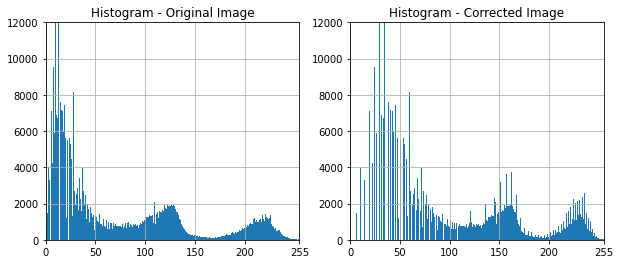

In [6]:
#hist_f = cv.calcHist([f], [0], None, [256], [0,256])
#hist_g = cv.calcHist([f_new], [0], None, [256], [0,256])

fig, axs = plt.subplots(1,2,figsize=(10,4))
#axs[0].plot(hist_f)
axs[0].hist(L.flatten(), 256, [0, 256])
axs[0].set_title("Histogram - Original Image")
axs[0].set_xlim(0,255)
axs[0].set_ylim(0,12000)
axs[0].set_xticks((0,50,100,150,200,255))
axs[0].set_xticklabels((0,50,100,150,200,255))
axs[0].grid()

#axs[1].plot(hist_g)
axs[1].hist(L_corrected.flatten(), 256, [0, 256])
axs[1].set_title("Histogram - Corrected Image")
axs[1].set_xlim(0,255)
axs[1].set_ylim(0,12000)
axs[1].set_xticks((0,50,100,150,200,255))
axs[1].set_xticklabels((0,50,100,150,200,255))
axs[1].grid()

plt.show()
